In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
#import scipy as sp
%matplotlib inline 
# to tell jupyter notebook
plt.rcParams['figure.figsize'] = (7,4)


In [3]:
! head P3_training_data # to tell linux

-1.3160,-0.62479,1.0818,1.5729,0.88185,-0.1234,0.43043,-1.1084,2.9889,0.035194,1
-0.77525,0.88267,-0.20861,1.1112,-0.65709,1.9916,1.2051,0.66908,-0.12104,-2.7346,1
-2.2775,0.052791,-1.8888,-4.2599,-0.44523,-2.0038,0.26508,0.08836,-1.3292,-1.9644,1
-1.4781,1.1491,0.12107,1.8742,1.0412,2.35,1.4558,1.7718,2.3006,-3.2459,1
-0.75993,-0.85008,-2.2927,-0.92024,-1.7776,0.96841,-1.4411,-3.3467,1.4429,-1.2892,1
-2.3351,-3.1986,-1.6225,-0.63923,-3.3595,-1.7694,-1.1246,1.2874,-2.0602,-2.1998,1
-0.16711,3.4929,0.031754,-0.39835,0.71612,0.92441,2.0324,0.9412,2.418,0.84021,1
1.1281,1.4865,0.51543,3.039,2.6175,0.35396,2.7287,2.5635,-0.1021,3.0705,1
-2.4846,-1.0009,-1.7199,-1.126,-1.8551,-2.0463,0.072687,-0.99739,-0.060612,0.11972,1
2.1463,-0.21499,-0.54312,0.8143,0.87458,2.7903,1.4112,1.0891,1.0621,-0.63129,1


## Data Description

The dataset contains 2-d samples generated from 

mu_1 = [0 0]' <br/>
mu_2 = [3 3]' <br/>
sigma= [4 0; 0 4]; <br/>
p(x|y=1)=Gaussian(mu_1,sigma) <br/>
p(x|y=-1)=Gaussian(mu_2,sigma)




        0         1        2        3        4        5        6        7   \
0 -1.31600 -0.624790  1.08180  1.57290  0.88185 -0.12340  0.43043 -1.10840   
1 -0.77525  0.882670 -0.20861  1.11120 -0.65709  1.99160  1.20510  0.66908   
2 -2.27750  0.052791 -1.88880 -4.25990 -0.44523 -2.00380  0.26508  0.08836   
3 -1.47810  1.149100  0.12107  1.87420  1.04120  2.35000  1.45580  1.77180   
4 -0.75993 -0.850080 -2.29270 -0.92024 -1.77760  0.96841 -1.44110 -3.34670   

        8         9   10  
0  2.98890  0.035194   1  
1 -0.12104 -2.734600   1  
2 -1.32920 -1.964400   1  
3  2.30060 -3.245900   1  
4  1.44290 -1.289200   1  
(100, 10) (100,)
[ 0.8170705   1.33905789  1.03703746  0.97667134  0.98350563  1.15258815
  1.14405219  1.18579346  1.27249734  0.84310677]
[ 3.86355072  3.38080652  3.4160442   4.93471363  4.12510687  3.20475738
  3.84121817  4.17348824  3.61932816  4.4793473 ]


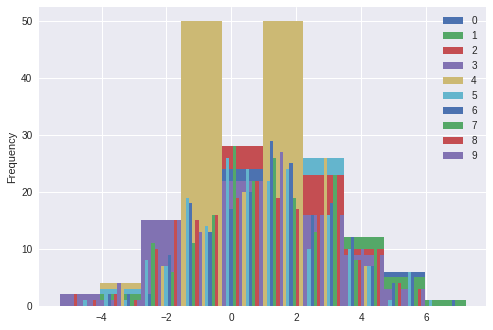

In [5]:
## Question
train = pd.read_csv('./P3_training_data',skiprows=0, header=None)
print(train.head())

X_train = train.values[:,0:-1]
y_train = train.values[:,-1]
print(X_train.shape, y_train.shape)

N = len(X_train)
d = X_train.shape[1] 

mu = np.average(X_train, axis = 0)
print(mu)
var = np.var(X_train, axis=0)
print(var)
sig = np.sqrt(var)

plt.style.use('seaborn')
train.plot.hist()
plt.hist(X_train)
plt.legend(range(d))

## Problem Statement

P2.  and P3.:  Here data is generated from Gaussian class conditional densities. In one case it is 2D and in the other case it is 10D. <br/> You have to explore learning a linear classifier using LMS algorithm and logistic regression. Also learn a classifier using fisher linear discriminant. Vary training set sizes and any other hyperparameters. What you need to submit is a report of all results and discussion.

## Linear Classifier LMS algorithm

In [10]:
def lms_accuracy(X, y , W):
    N = X.shape[0]
    X = np.column_stack( (X, np.ones(shape=(N,)) ))
    
    # Calculating accuracy
    # Works both for (1,-1) and (1,0)
    y_mask = X.dot(W) > 0     
    y_ = y > 0
    
    return(np.sum(y_ == y_mask.squeeze()) /N) 
    #print('accuracy = {:.3f}'.format(np.sum(y_ == y_mask.squeeze()) /N))
 

0.85


Text(0.5,0,'epochs')

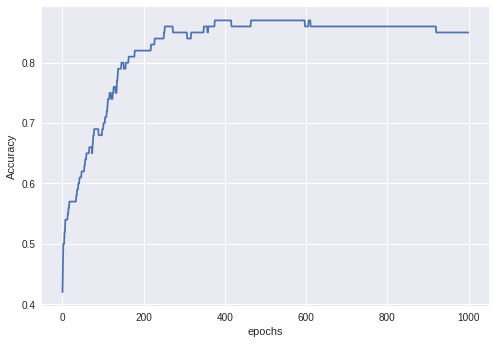

In [11]:
# initializes weight
W = np.random.randn(d + 1, 1)
#print(W.shape)
lr = 1e-4

X_ = np.column_stack( (X_train, np.ones(shape=(N,)) ))
#print(X_.shape)
acc = []
for epoch in range(1000):
    for i in range(N):
        x = X_[i,:][:,np.newaxis].T
        #x = x[:,np.newaxis].T
        er = x.dot(W) - y_train[i]
        W = W - lr*(x.T.dot(er))
    acc.append(lms_accuracy(X_train, y_train, W))
    
print(acc[-1])
plt.plot(acc)
plt.ylabel('Accuracy')
plt.xlabel('epochs')

In [12]:
print('test accuracy {:.3f}'.format(lms_accuracy(X_test, y_test, W)))

test accuracy 0.770


## Logistic Regression

(100, 10)
(100, 11)
0.71


Text(0.5,0,'epochs')

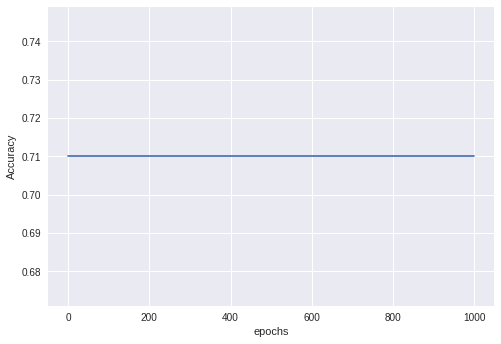

In [44]:

print(X_train.shape)

# seed 0 , 1, 2 ... gives very very bad accuracies
# DON'T KNOW WHY

W = W = np.random.randn(d + 1, )
X_ = np.column_stack( (X_train, np.ones(shape=(N,)) ))
y_ = (y_train + 1)/2
lr = 1e-4

print(X_.shape)

acc = []

for epoch in range(1000):
    for i in range(X_.shape[0]):
        
        x = X_[i,:]
        y = y_[i]
        
        o = np.exp(W.dot(x))
        sig = o / (1 + o)
        
        err = sig * (1 - sig) * (sig - y)
        
        W -= lr * (err * x)
        
    acc.append(lms_accuracy(X_train, y_, W))
    
print(acc[-1])
plt.plot(acc)
plt.ylabel('Accuracy')
plt.xlabel('epochs')

In [20]:
y_test_ = (y_test + 1)/2

print('test accuracy {:.3f}'.format(lms_accuracy(X_test, y_test_, W)))

test accuracy 0.780



## Fisher Linear Discriminant
vary training set size and other parameters

In [21]:
W = W = np.random.randn(d, )
n0 = 0
n1 = 0
M0 = np.zeros(d,)
M1 = np.zeros(d,)

M0 = np.average(X_train[y_train < 0, :], axis = 0)
M1 = np.average(X_train[y_train > 0, :], axis = 0)

Sw = np.zeros((d,d))

for i in range(X_train.shape[0]):
    if y_train[i] > 0:
        x = X_train[i,:] - M0
        x = x[:,np.newaxis]
        Sw += x.dot(x.T)
    else:
        x = X_train[i,:] - M1 
        x = x[:,np.newaxis]
        Sw += x.dot(x.T)
        
print(Sw)
W = np.linalg.inv(Sw).dot(M1 - M0)
print(M1, M0)
print(W)

[[ 630.99397187  475.93683925  430.8527706   577.89000124  494.96489668
   428.43219479  442.03752955  536.13787998  346.00263555  558.19314023]
 [ 475.93683925  711.95473567  464.33474702  648.5942018   603.58967832
   462.062943    504.19322095  578.31529068  436.43273237  635.32359931]
 [ 430.8527706   464.33474702  553.40808971  537.80961002  507.90902224
   406.83420204  431.84541309  520.65373035  340.0795286   547.90545776]
 [ 577.89000124  648.5942018   537.80961002  908.52777954  683.78782881
   575.05750239  594.44856573  675.24577801  485.29272329  710.98287911]
 [ 494.96489668  603.58967832  507.90902224  683.78782881  791.46245127
   526.4306539   511.18809622  652.91548123  438.41416211  673.6998708 ]
 [ 428.43219479  462.062943    406.83420204  575.05750239  526.4306539
   581.17951672  413.79197044  548.15111699  360.28014624  523.37121374]
 [ 442.03752955  504.19322095  431.84541309  594.44856573  511.18809622
   413.79197044  620.56940949  590.63226426  344.43883148  

-0.00364148605
train accuracy:  0.86
test accuracy:  0.77


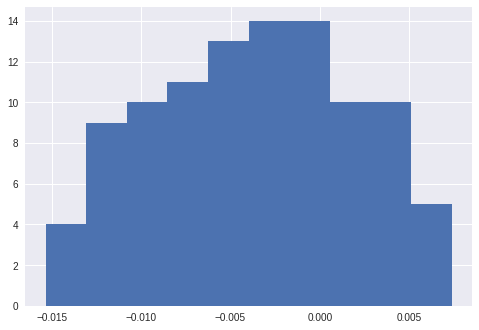

In [22]:
data = X_train.dot(W)
plt.hist(data)

## Using bayes classifier and normal distribution 
## the threshold is the mean of the average
b = (np.average(data[y_train > 0]) + np.average(data[y_train < 0]))/2
## Considering when variance is same for both

print(b)

## Classifier is:

accuracy = np.average(np.sign(data - b) == y_train)
print('train accuracy: ',accuracy)

test_accuracy = np.average(np.sign(X_test.dot(W) - b) == y_test)
print('test accuracy: ',test_accuracy)


<hr>

# Testing

(100, 10)
(100,)


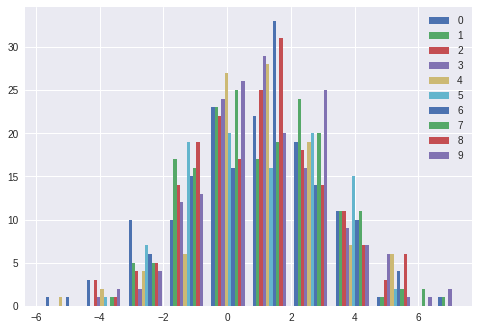

In [9]:
## Question
test = pd.read_csv('./P3_test_data',skiprows=0, header=None)
#print(train.head)

X_test = test.values[:,0:-1]
y_test = test.values[:,-1]
print(X_test.shape)
print(y_test.shape)

N_test = len(X_test)
d = X_test.shape[1] 

mu = np.average(X_test)
var = np.var(X_test)
sig = np.sqrt(var)

plt.figure
plt.hist(X_test)
plt.legend(range(d))

# Sklearn

## Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(tol=1e-4, penalty='l2', solver ='liblinear', max_iter = 1000)

clf.fit(X_train,y_train)

print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.87
0.8


## Linear Discriminant Analysis

In [32]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


clf = LinearDiscriminantAnalysis(solver='svd',tol=1e-4)

clf.fit(X_train, y_train)

print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))


0.86
0.77
